## 데이터 불러오기

In [5]:
import pandas as pd
import numpy as np

In [6]:
dpath = 'C:/Users/minki/Desktop/2022CUAI_winter/'
data = pd.read_csv(dpath + 'metadata.csv')
data

,album_id,album_name,artist,album_release_date,album_total_tracks,emotion,playlist_name
0,0025Y5D7IOZVpEfQtpvHIi,Into the Surf,Foals,2019-09-25,3,relaxed,calm winter morning ☆☆
1,002hMu6uJDan1XKVp3pmnb,Becoming,Feather,2021-01-13,5,sad,Sad Beats
2,002mOl8os2F1mDYRz8qU2a,Антигерой,ELMAN,2019-06-06,1,sad,슬픔
3,004EYz2DQttcGvyTQGDmLp,Merry Christmas Baby / White Christmas,Otis Redding,1968,2,happy,Happy Holidays
4,005KGm28jIUE3hW019Itx6,Too Much Love,Mujo,2021-04-15,1,relaxed,"Chill Beats 💙 groove, relax"
...,...,...,...,...,...,...,...
63309,7zw73YMhMg7lnMrkUAzE8t,Just Another Memory,JustSidekicks,2020-07-10,1,happy,Happy Vibes ?��
63310,7zwLfr8xSz9rWPU5KNBHkQ,cherry,Oatmello,2019-05-24,1,relaxed,Relax Lofi 😴
63311,7zxLuEY7mKLKdyWjnCfP35,Colorblind (feat. Dayseeker),Adventure Club,2021-08-13,1,sad,Sad Beats
63312,7zxfQk44mX0eW4eWtdDlKI,Mind Right,TK N Cash,2014-10-14,1,angry,Pissed Off Workout


In [7]:
data_angry = data[data.emotion=='angry']
data_sad = data[data.emotion=='sad']
data_happy = data[data.emotion=='happy']
data_relaxed = data[data.emotion=='relaxed']

In [8]:
from PIL import Image

image_list = []
image_array_list = []
na_id = []

for album_id in data_relaxed['album_id']:
    image_list.append(Image.open(dpath + 'emotion_album_images/relaxed/{}.jpg'.format(album_id)).resize((300,300)))
    image_array_list.append(np.array(image_list[-1]))

In [1]:
# Import the libraries
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from pathlib import Path
from PIL import Image

In [3]:
#VGG 16 이용해 특징 추출하기
class FeatureExtractor:
    def __init__(self):
        # Use VGG-16 as the architecture and ImageNet for the weight
        base_model = VGG16(weights='imagenet')
        # Customize the model to return features from fully-connected layer
        self.model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)


    def extract(self, img):
        # Resize the image
        img = img.resize((224, 224))
        # Convert the image color space
        img = img.convert('RGB')
        # Reformat the image
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        # Extract Features
        feature = self.model.predict(x)[0]
        return feature / np.linalg.norm(feature)

In [11]:
fe = FeatureExtractor()
for img_file in image_list:
    # Extract Features
    feature = fe.extract(img_file)
    # Save the Numpy array (.npy) on designated path
    feature_path = "relaxed_feature.npy"
    np.save(feature_path, feature)

553467904/553467096 [==============================] - 11s 0us/step


In [18]:
features = []

for i in feature_path:
    features.append(feature)

In [28]:
img_paths =[]
    
for album_id in data_relaxed['album_id']:
    img_paths.append(dpath + 'emotion_album_images/relaxed/{}.jpg'.format(album_id))


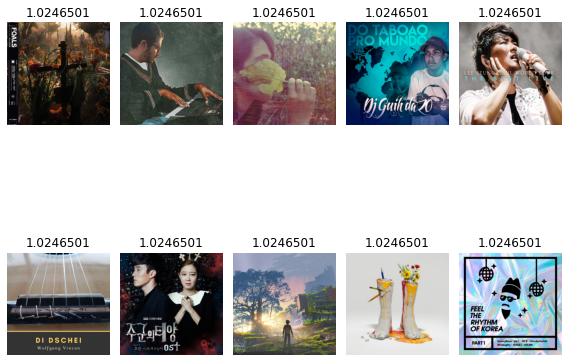

In [35]:
# Import the libraries
import matplotlib.pyplot as plt
import numpy as np
# Insert the image query
img = Image.open("C:/Users/minki/Desktop/2022CUAI_winter/image2.jpg")
# Extract its features
query = fe.extract(img)
# Calculate the similarity (distance) between images
dists = np.linalg.norm(features - query, axis=1)
# Extract 10 images that have lowest distance
ids = np.argsort(dists)[:10]
scores = [(dists[album_id], img_paths[album_id]) for album_id in ids]
# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8))
for a in range(2*5):
    score = scores[a]
    axes.append(fig.add_subplot(2, 5, a+1))
    subplot_title=str(score[0])
    axes[-1].set_title(subplot_title)  
    plt.axis('off')
    plt.imshow(Image.open(score[1]))
fig.tight_layout()
plt.show()

...유사도를 함께 나타내는데 왜 1이 넘어...ㅠㅠ 뭔가가 잘못되어도 단단히 잘못되었는데.. 뭐가 잘못되었을까